Saving W. Kip Viscusi law.csv to W. Kip Viscusi law.csv
Optimized values: a = 0.0, b = 7830.8240219562385, c = 1.6186645400580382
RMSE (Model 2): 55.89297135214212


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

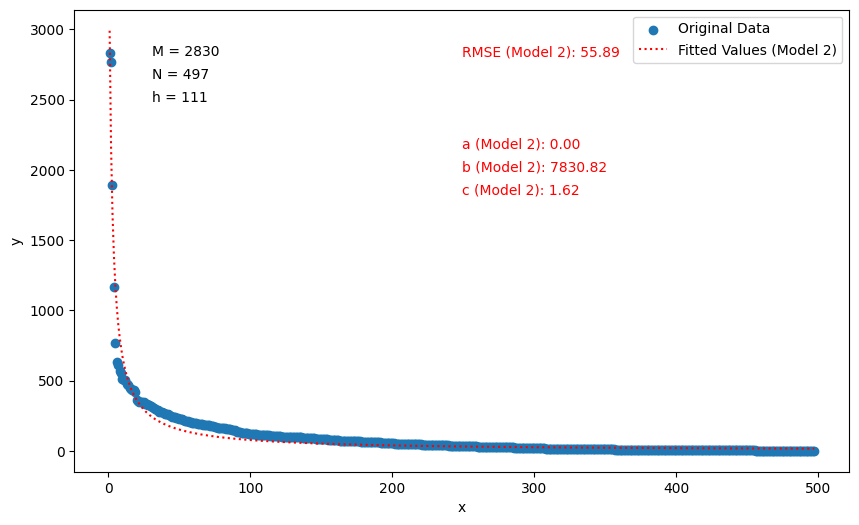

In [11]:
!pip install python-docx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from docx import Document
from docx.shared import Inches
from scipy.optimize import minimize

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

x_data = data['Serial Number'].values
y_data = data['Cites'].values

def calculate_h_index(y_data):
    sorted_cites = np.sort(y_data)[::-1]
    h_index = np.max(np.where(sorted_cites >= np.arange(1, len(sorted_cites) + 1))[0]) + 1
    return h_index

h = calculate_h_index(y_data)
M = max(y_data)
N = len(y_data)

def equation2(params, x):
    a, b, c = params
    return (b / (x + c)) - a

def rmse_loss2(params, x, y):
    y_pred = equation2(params, x)
    return np.sqrt(np.mean((y - y_pred) ** 2))

initial_params = [0.1, 1000, 225]

result = minimize(rmse_loss2, initial_params, args=(x_data, y_data), method='L-BFGS-B', bounds=[(0, None), (0, None), (0, None)])

a_opt, b_opt, c_opt = result.x
rmse2 = result.fun

print(f'Optimized values: a = {a_opt}, b = {b_opt}, c = {c_opt}')
print(f'RMSE (Model 2): {rmse2}')

fitted_values2 = equation2([a_opt, b_opt, c_opt], x_data)

data['fitted2'] = fitted_values2
data['a'] = a_opt
data['b'] = b_opt
data['c'] = c_opt

output_file2 = 'fitted_citation_data_model2.csv'
data.to_csv(output_file2, index=False)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, fitted_values2, color='red', linestyle=':', label='Fitted Values (Model 2)')
plt.text(0.5, 0.9, f'RMSE (Model 2): {rmse2:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.5, 0.7, f'a (Model 2): {a_opt:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.5, 0.65, f'b (Model 2): {b_opt:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.5, 0.6, f'c (Model 2): {c_opt:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.1, 0.9, f'M = {M}', transform=plt.gca().transAxes, color='black')
plt.text(0.1, 0.85, f'N = {N}', transform=plt.gca().transAxes, color='black')
plt.text(0.1, 0.8, f'h = {h}', transform=plt.gca().transAxes, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('comparison_plot_model2.png')

doc = Document()
doc.add_heading('Fitted Citation Data Analysis for Model 2', level=1)
doc.add_paragraph('This document contains the analysis of fitted citation data with Model 2.')
doc.add_picture('comparison_plot_model2.png', width=Inches(6))
doc.save('fitted_citation_analysis_model2.docx')

files.download('fitted_citation_analysis_model2.docx')

